In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# load data
df = pd.read_csv('/Users/cristianmurillo/Documents/Data scientis /Machine learning models /Data_Sets/housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='latitude'>

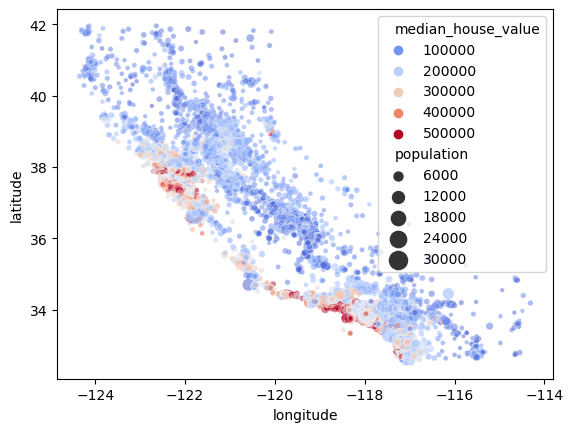

In [5]:
sns.scatterplot(x='longitude', y='latitude', data=df ,hue='median_house_value', palette='coolwarm',size='population',sizes=(10,200),alpha=0.5)

<Axes: xlabel='longitude', ylabel='latitude'>

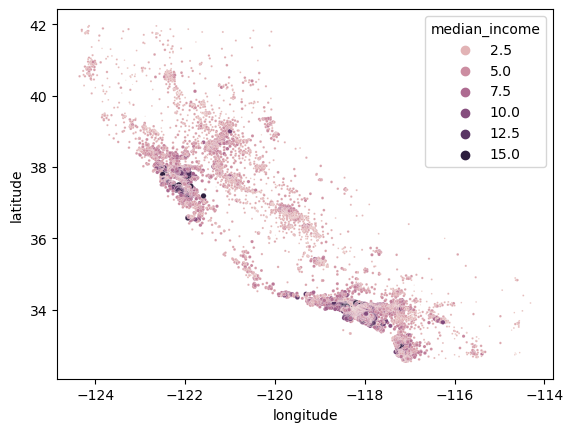

In [6]:
sns.scatterplot(x='longitude', y='latitude', data=df ,hue='median_income',s=df['median_income'])

In [7]:
from sklearn.cluster import KMeans
x = df.loc[:,['longitude','latitude','median_income']]
model = KMeans(n_clusters=4)
pred = model.fit_predict(x)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
x['seg_economic'] = pred
x

,longitude,latitude,median_income,seg_economic
0,-122.23,37.88,8.3252,3
1,-122.22,37.86,8.3014,3
2,-122.24,37.85,7.2574,3
3,-122.25,37.85,5.6431,3
4,-122.25,37.85,3.8462,1
...,...,...,...,...
20635,-121.09,39.48,1.5603,1
20636,-121.21,39.49,2.5568,1
20637,-121.22,39.43,1.7000,1
20638,-121.32,39.43,1.8672,1


In [20]:
x['seg_economic'].value_counts()

seg_economic
0    8806
1    6301
2    3135
3    2398
Name: count, dtype: int64

<Axes: xlabel='longitude', ylabel='latitude'>

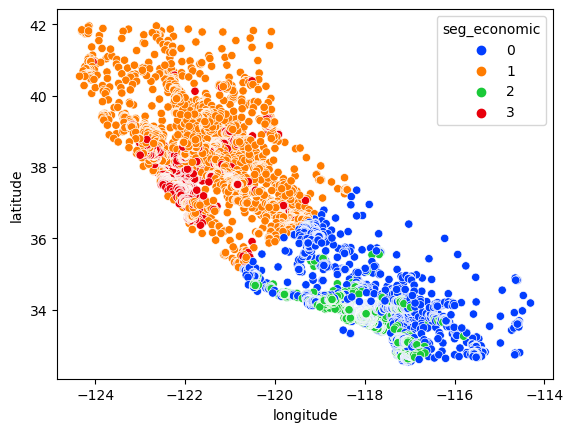

In [10]:
sns.scatterplot(x='longitude', y='latitude', data=x ,hue='seg_economic', palette='bright')

<Axes: xlabel='seg_economic', ylabel='count'>

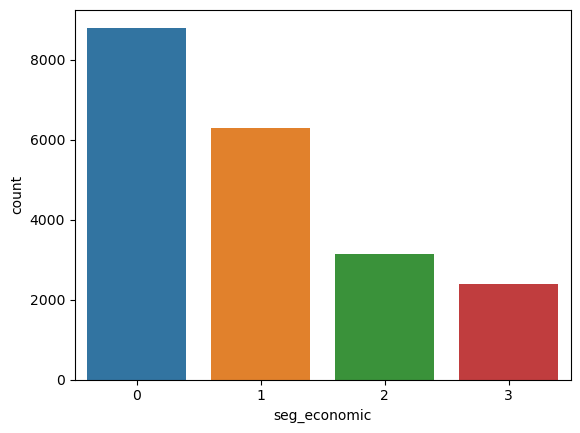

In [11]:
sns.countplot(x='seg_economic', data=x)

In [12]:
x.groupby('seg_economic').mean()

,longitude,latitude,median_income
seg_economic,,,
0,-117.989607,33.966516,3.037758
1,-121.625372,38.066345,2.917599
2,-118.054357,33.863167,6.402764
3,-121.951768,37.662807,6.123310


In [13]:
df['pop_per_household'] = df['population']/df['households']

In [24]:
x2 = df.loc[:,['longitude','latitude','pop_per_household']]
model2 = KMeans(n_clusters=2)
pred2 = model2.fit_predict(x2)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
x2['predic_per_households'] = pred2
x2

,longitude,latitude,pop_per_household,predic_per_households
0,-122.23,37.88,2.555556,0
1,-122.22,37.86,2.109842,0
2,-122.24,37.85,2.802260,0
3,-122.25,37.85,2.547945,0
4,-122.25,37.85,2.181467,0
...,...,...,...,...
20635,-121.09,39.48,2.560606,0
20636,-121.21,39.49,3.122807,0
20637,-121.22,39.43,2.325635,0
20638,-121.32,39.43,2.123209,0


<Axes: xlabel='longitude', ylabel='latitude'>

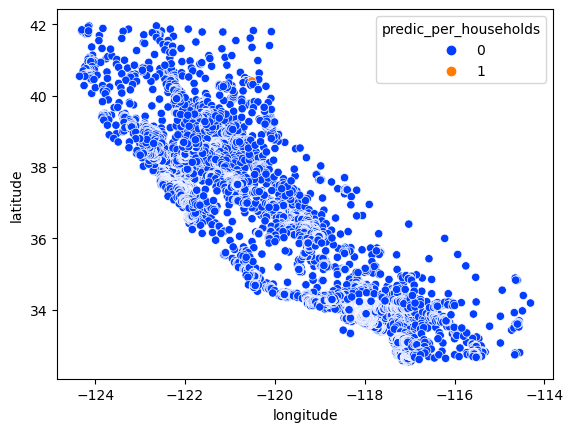

In [26]:
sns.scatterplot(x='longitude', y='latitude', data=x2 ,hue='predic_per_households', palette='bright')

In [27]:
x2['predic_per_households'].value_counts()

predic_per_households
0    20637
1        3
Name: count, dtype: int64

In [32]:
x3 = df.loc[:,['longitude','latitude','housing_median_age']]
model3 = KMeans(n_clusters=5)
pred3 = model3.fit_predict(x3)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
x3['predic_housing_median_age'] = pred3
x3

,longitude,latitude,housing_median_age,predic_housing_median_age
0,-122.23,37.88,41.0,1
1,-122.22,37.86,21.0,0
2,-122.24,37.85,52.0,3
3,-122.25,37.85,52.0,3
4,-122.25,37.85,52.0,3
...,...,...,...,...
20635,-121.09,39.48,25.0,2
20636,-121.21,39.49,18.0,0
20637,-121.22,39.43,17.0,0
20638,-121.32,39.43,18.0,0


<Axes: xlabel='longitude', ylabel='latitude'>

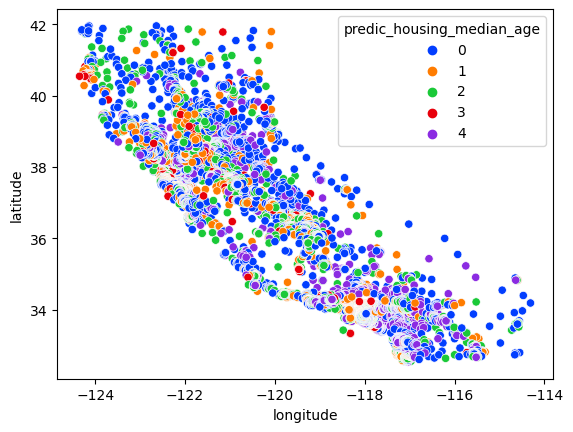

In [34]:
sns.scatterplot(x='longitude', y='latitude', data=x3 ,hue='predic_housing_median_age', palette='bright')

In [36]:
x3['predic_housing_median_age'] .value_counts()

predic_housing_median_age
1    5693
0    4929
2    4465
3    3344
4    2209
Name: count, dtype: int64